# Autoencoderサンプル(Pytorch)
作成日2021/05/02 

参考
- https://www.youtube.com/watch?v=zp8clK9yCro

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

## データセットの読み込み

In [5]:
transform = transforms.ToTensor()
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
mnist_data = datasets.MNIST(root = './data', train = True, download =True, transform = transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size = 64, shuffle = True)

In [20]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images), torch.max(images))
print(torch.min(labels), torch.max(labels))

tensor(0.) tensor(1.)
tensor(0) tensor(9)


https://www.atmarkit.co.jp/ait/articles/2005/12/news015_2.html

## NormalAutoEncoder

In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        #N(バッチサイズ), 784(ピクセル数64x64)
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), #N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64), #N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 12), #N,64 -> N,12
            nn.ReLU(),
            nn.Linear(12, 3), #N,12 -> N,3
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), #N,784 -> N,128
            nn.ReLU(),
            nn.Linear(12, 64), #N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 128), #N,64 -> N,12
            nn.ReLU(),
            nn.Linear(128, 28*28), #N,12 -> N,3
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

## CNNAutoEncoder

In [37]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        #N,784 -> N,128
        self.encoder = nn.Sequential( 
            nn.Conv2d(1, 16, 3, stride=2, padding=1),#N, 1, 28, 28 -> N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),#N, 16, 14, 14 -> N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)#N, 32, 7, 7 -> N, 64, 1, 1
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [38]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [39]:
outputs = []
num_epochs = 10
for epoch in range(num_epochs):
    for (img, _) in data_loader:
#         img = img.reshape(-1, 28*28) #一次元の場合
        recon = model(img)
        loss = criterion(recon, img)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0089
Epoch:2, Loss:0.0061
Epoch:3, Loss:0.0048
Epoch:4, Loss:0.0041
Epoch:5, Loss:0.0032
Epoch:6, Loss:0.0032
Epoch:7, Loss:0.0031
Epoch:8, Loss:0.0031
Epoch:9, Loss:0.0029
Epoch:10, Loss:0.0026


IndexError: list index out of range

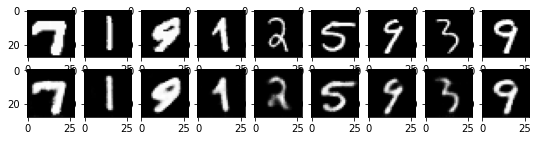

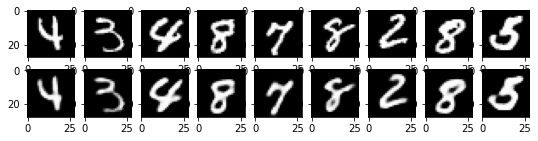

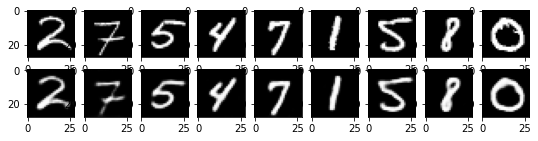

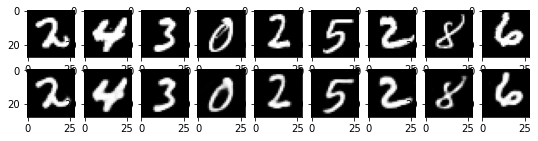

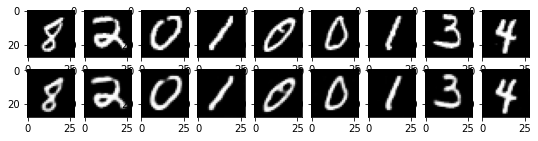

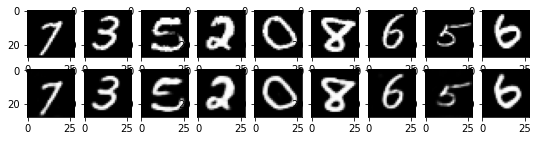

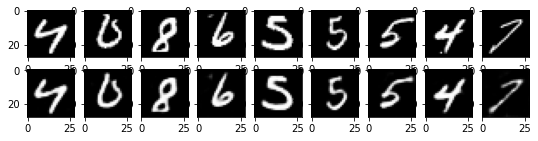

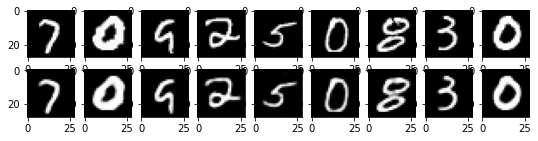

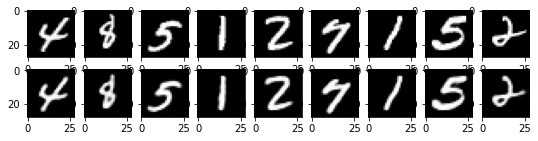

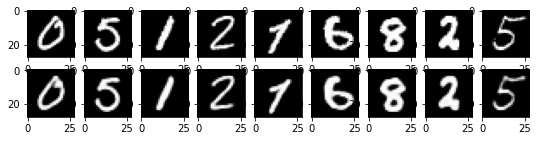

<Figure size 648x144 with 0 Axes>

In [40]:
for k in range(0, max_epochs, 1):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
#         item = item.reshape(-1, 28, 28)#一次元の場合
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
#         item = item.reshape(-1, 28,  28)#一次元の場合
        plt.imshow(item[0])

- 
# 輝度分布のデータで学習
CSVから読み取る場合＋取得データをNumpy形式で保存

In [30]:
import numpy as np
import csv
import pandas as pd
root_path = "Obrid_AE/test_data/"
test_data_path = root_path + "data0503.csv"
#---------------CSVから読み取る----------------------------
data_df = pd.read_csv(test_data_path, engine="python")
data = data_df.values
#---------------CSVから読み取る----------------------------
print(data.shape)
print(data[0])
#Numpy形式で保存https://note.nkmk.me/python-numpy-load-save-savez-npy-npz/
np.save(root_path + "np_data", data)

(100, 256)
[ 20  24  22  26  24  28  30  24  30  30  32  32  36  34  36  40  36  40
  40  42  42  42  48  50  46  48  50  54  52  54  52  56  54  60  58  58
  56  58  60  60  60  56  58  54  58  58  56  50  52  50  50  48  46  46
  44  44  42  46  40  38  38  34  36  32  32  32  30  30  32  30  32  32
  32  32  30  30  30  32  26  30  30  30  30  28  26  30  30  24  30  32
  30  30  30  32  32  36  32  30  30  30  36  34  34  32  32  34  34  28
  32  34  28  34  38  42  42  44  46  48  50  58  60  64  66  68  72  74
  80  72  80  88  90  90  92  90  94  94  90  90  84  88  84  86  88  84
  84  80  82  82  78  78  74  74  70  66  66  64  64  64  60  56  54  52
  50  46  44  44  38  36  26  26  28  26  22  20  16  14  14  10   6   8
  10  10   8   6   8   6   8   6  10   8  12  10  10  10  10  10  10  10
  12  10   8  12  10  12  12  14  10  16  12  14  14  14  16  16  18  22
  22  22  24  30  30  34  34  38  40  46  48  52  54  42  58  64  68  68
  70  72  76  72  78  80  86  90  88  94

In [31]:
import numpy as np
#---------------Numpy形式から読み取る----------------------------
data = np.load(root_path + "np_data" + ".npy")
#---------------Numpy形式から読み取る----------------------------
#エポック数とエポック自体のサイズ
epoch_num = 200
epoch_size = 20
list=[]
for i in range(epoch_num):
    #ランダムに配列の番号をランダムに指定
    make_epoch = np.random.randint(0, len(data), (epoch_size))
    #ランダムに指定した番号のデータを選択、リストに追加
    list.append(data[make_epoch, :])
test_data = np.array(list)/1024
test_data.shape

(200, 20, 256)

## NormalAutoEncoder

In [22]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        #N(バッチサイズ), 784(ピクセル数64x64)
        self.encoder = nn.Sequential(
            nn.Linear(256, 128), #N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64), #N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 12), #N,64 -> N,12
            nn.ReLU(),
            nn.Linear(12, 3), #N,12 -> N,3
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), #N,784 -> N,128
            nn.ReLU(),
            nn.Linear(12, 64), #N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 128), #N,64 -> N,12
            nn.ReLU(),
            nn.Linear(128, 256), #N,12 -> N,3
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

##  一次元CNN実装中

In [23]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        #N(バッチサイズ), 784(ピクセル数64x64)
        self.encoder = nn.Sequential(
            nn.Conv1d(256, 43, kernel_size = 42, stride = 5)
            nn.Conv1d(43, 43, kernel_size = 42, stride = 5)
#             nn.Linear(256, 128), #N,784 -> N,128
#             nn.ReLU(),
#             nn.Linear(128, 64), #N,128 -> N,64
#             nn.ReLU(),
#             nn.Linear(64, 12), #N,64 -> N,12
#             nn.ReLU(),
#             nn.Linear(12, 3), #N,12 -> N,3
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), #N,784 -> N,128
            nn.ReLU(),
            nn.Linear(12, 64), #N,128 -> N,64
            nn.ReLU(),
            nn.Linear(64, 128), #N,64 -> N,12
            nn.ReLU(),
            nn.Linear(128, 256), #N,12 -> N,3
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [46]:
#カーネルサイズとストライドから入出力の関係を算出
cnnInput = 256
cnnKernelSize = 32
cnnStride = 20
cnnoutput = (256 -   42 + 1)/5
cnnoutput

43.0

## 学習

In [24]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

outputs = []
#テンソル型に変換
test_data = torch.from_numpy(test_data.astype(np.float32)).clone()
for epoch in test_data:
    for data in epoch:
        recon = model(data)
        loss = criterion(recon, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, data, recon))

Epoch:tensor([[1.0117, 1.0098, 1.0098,  ..., 1.0781, 1.0781, 1.0781],
        [1.0137, 1.0156, 1.0156,  ..., 1.1094, 1.1055, 1.1035],
        [1.0059, 1.0078, 1.0059,  ..., 1.1348, 1.1309, 1.1348],
        ...,
        [1.0137, 1.0156, 1.0156,  ..., 1.1230, 1.1191, 1.1152],
        [1.0039, 1.0020, 1.0039,  ..., 1.1055, 1.1055, 1.1016],
        [1.0078, 1.0039, 1.0078,  ..., 1.0566, 1.0527, 1.0527]]), Loss:0.1700
Epoch:tensor([[1.0254, 1.0273, 1.0254,  ..., 1.1523, 1.1523, 1.1562],
        [1.0312, 1.0332, 1.0332,  ..., 1.0488, 1.0449, 1.0488],
        [1.0586, 1.0605, 1.0605,  ..., 1.1465, 1.1426, 1.1484],
        ...,
        [1.0254, 1.0273, 1.0273,  ..., 1.1523, 1.1484, 1.1523],
        [1.0391, 1.0430, 1.0410,  ..., 1.1230, 1.1230, 1.1250],
        [1.0449, 1.0449, 1.0469,  ..., 1.1465, 1.1426, 1.1445]]), Loss:0.0015
Epoch:tensor([[1.0156, 1.0195, 1.0176,  ..., 1.0977, 1.0938, 1.0938],
        [1.0020, 1.0000, 1.0039,  ..., 1.0605, 1.0586, 1.0586],
        [1.0000, 1.0000, 1.0000,

Epoch:tensor([[1.0039, 1.0059, 1.0020,  ..., 1.1094, 1.1094, 1.1094],
        [1.0000, 1.0020, 1.0020,  ..., 1.1387, 1.1328, 1.1348],
        [1.0000, 1.0020, 1.0020,  ..., 1.0059, 1.0059, 1.0059],
        ...,
        [1.0020, 1.0059, 1.0020,  ..., 1.0898, 1.0879, 1.0879],
        [1.0234, 1.0273, 1.0234,  ..., 1.1309, 1.1289, 1.1289],
        [1.0371, 1.0391, 1.0371,  ..., 1.1777, 1.1758, 1.1777]]), Loss:0.0008
Epoch:tensor([[1.0039, 1.0000, 1.0020,  ..., 1.1250, 1.1230, 1.1211],
        [1.0234, 1.0273, 1.0234,  ..., 1.1309, 1.1289, 1.1289],
        [1.0215, 1.0234, 1.0215,  ..., 1.1406, 1.1406, 1.1406],
        ...,
        [1.0195, 1.0234, 1.0215,  ..., 1.0996, 1.0957, 1.1016],
        [1.0684, 1.0703, 1.0703,  ..., 1.1074, 1.1074, 1.1113],
        [1.0195, 1.0215, 1.0176,  ..., 1.0273, 1.0254, 1.0273]]), Loss:0.0011
Epoch:tensor([[1.0137, 1.0156, 1.0156,  ..., 1.0430, 1.0391, 1.0410],
        [1.0195, 1.0215, 1.0176,  ..., 1.0273, 1.0254, 1.0273],
        [1.0117, 1.0156, 1.0117,

Epoch:tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0859, 1.0820, 1.0801],
        [1.0195, 1.0234, 1.0215,  ..., 1.1152, 1.1094, 1.1113],
        [1.0000, 1.0000, 1.0000,  ..., 1.0664, 1.0645, 1.0625],
        ...,
        [1.0234, 1.0254, 1.0254,  ..., 1.1895, 1.1875, 1.1875],
        [1.0137, 1.0156, 1.0156,  ..., 1.1230, 1.1191, 1.1152],
        [1.0156, 1.0176, 1.0176,  ..., 1.0977, 1.0938, 1.0938]]), Loss:0.0000
Epoch:tensor([[1.0000, 1.0020, 1.0020,  ..., 1.1387, 1.1328, 1.1348],
        [1.0605, 1.0605, 1.0645,  ..., 1.1309, 1.1289, 1.1309],
        [1.0039, 1.0039, 1.0059,  ..., 1.1465, 1.1465, 1.1484],
        ...,
        [1.0137, 1.0156, 1.0156,  ..., 1.1230, 1.1191, 1.1152],
        [1.0117, 1.0156, 1.0156,  ..., 1.1094, 1.1074, 1.1094],
        [1.0098, 1.0078, 1.0078,  ..., 1.0977, 1.0938, 1.0957]]), Loss:0.0007
Epoch:tensor([[1.0195, 1.0215, 1.0215,  ..., 1.1426, 1.1426, 1.1445],
        [1.0234, 1.0254, 1.0254,  ..., 1.1895, 1.1875, 1.1875],
        [1.0078, 1.0039, 1.0059,

Epoch:tensor([[1.2109, 1.2051, 1.2070,  ..., 1.3555, 1.3516, 1.3496],
        [1.0234, 1.0215, 1.0195,  ..., 1.1250, 1.1211, 1.1211],
        [1.0684, 1.0684, 1.0703,  ..., 1.2285, 1.2246, 1.2266],
        ...,
        [1.0059, 1.0000, 1.0039,  ..., 1.1270, 1.1270, 1.1270],
        [1.0410, 1.0430, 1.0410,  ..., 1.0977, 1.0996, 1.1016],
        [1.0039, 1.0059, 1.0059,  ..., 1.0137, 1.0117, 1.0137]]), Loss:0.0002
Epoch:tensor([[1.0098, 1.0078, 1.0078,  ..., 1.0977, 1.0938, 1.0957],
        [1.0039, 1.0059, 1.0020,  ..., 1.1094, 1.1094, 1.1094],
        [1.0000, 1.0020, 1.0020,  ..., 1.0059, 1.0059, 1.0059],
        ...,
        [1.0078, 1.0039, 1.0078,  ..., 1.0840, 1.0781, 1.0781],
        [1.0039, 1.0020, 1.0039,  ..., 1.1055, 1.1055, 1.1016],
        [1.0215, 1.0234, 1.0215,  ..., 1.1406, 1.1406, 1.1406]]), Loss:0.0003
Epoch:tensor([[1.0527, 1.0488, 1.0527,  ..., 1.2285, 1.2246, 1.2285],
        [1.0039, 1.0000, 1.0000,  ..., 1.0840, 1.0820, 1.0801],
        [1.0254, 1.0273, 1.0254,

Epoch:tensor([[1.0098, 1.0078, 1.0078,  ..., 1.0898, 1.0820, 1.0879],
        [1.0234, 1.0273, 1.0234,  ..., 1.1309, 1.1289, 1.1289],
        [1.0137, 1.0137, 1.0156,  ..., 1.1230, 1.1172, 1.1191],
        ...,
        [1.0098, 1.0078, 1.0098,  ..., 1.0801, 1.0781, 1.0801],
        [1.0156, 1.0078, 1.0117,  ..., 1.0840, 1.0781, 1.0801],
        [1.0117, 1.0098, 1.0098,  ..., 1.0781, 1.0781, 1.0781]]), Loss:0.0004
Epoch:tensor([[1.0020, 1.0059, 1.0020,  ..., 1.0898, 1.0879, 1.0879],
        [1.0020, 1.0059, 1.0020,  ..., 1.0898, 1.0879, 1.0879],
        [1.0391, 1.0430, 1.0410,  ..., 1.1230, 1.1230, 1.1250],
        ...,
        [1.0059, 1.0020, 1.0039,  ..., 1.0762, 1.0723, 1.0723],
        [1.0605, 1.0605, 1.0645,  ..., 1.1309, 1.1289, 1.1309],
        [1.0098, 1.0039, 1.0078,  ..., 1.0684, 1.0664, 1.0684]]), Loss:0.0002
Epoch:tensor([[1.0039, 1.0039, 1.0059,  ..., 1.1465, 1.1465, 1.1484],
        [1.1152, 1.1152, 1.1172,  ..., 1.2305, 1.2305, 1.2305],
        [1.0391, 1.0430, 1.0410,

Epoch:tensor([[1.0137, 1.0156, 1.0156,  ..., 1.0430, 1.0391, 1.0410],
        [1.0234, 1.0215, 1.0195,  ..., 1.1250, 1.1211, 1.1211],
        [1.0098, 1.0078, 1.0098,  ..., 1.0801, 1.0781, 1.0801],
        ...,
        [1.0195, 1.0215, 1.0195,  ..., 1.1582, 1.1562, 1.1582],
        [1.1035, 1.1055, 1.1055,  ..., 1.1113, 1.1074, 1.1113],
        [1.0059, 1.0020, 1.0039,  ..., 1.0762, 1.0723, 1.0723]]), Loss:0.0003
Epoch:tensor([[1.0078, 1.0039, 1.0078,  ..., 1.0566, 1.0527, 1.0527],
        [1.0234, 1.0254, 1.0254,  ..., 1.1895, 1.1875, 1.1875],
        [1.0684, 1.0684, 1.0703,  ..., 1.2285, 1.2246, 1.2266],
        ...,
        [1.0137, 1.0156, 1.0156,  ..., 1.1152, 1.1074, 1.1094],
        [1.0078, 1.0039, 1.0078,  ..., 1.0840, 1.0781, 1.0781],
        [1.0039, 1.0000, 1.0000,  ..., 1.0840, 1.0820, 1.0801]]), Loss:0.0004
Epoch:tensor([[1.0078, 1.0039, 1.0059,  ..., 1.0625, 1.0605, 1.0625],
        [1.0059, 1.0000, 1.0039,  ..., 1.0039, 1.0020, 1.0059],
        [1.0527, 1.0488, 1.0527,

Epoch:tensor([[1.0234, 1.0215, 1.0195,  ..., 1.1250, 1.1211, 1.1211],
        [1.0234, 1.0273, 1.0234,  ..., 1.1309, 1.1289, 1.1289],
        [1.0371, 1.0391, 1.0371,  ..., 1.1777, 1.1758, 1.1777],
        ...,
        [1.0137, 1.0137, 1.0156,  ..., 1.1230, 1.1172, 1.1191],
        [1.0195, 1.0215, 1.0195,  ..., 1.1582, 1.1562, 1.1582],
        [1.0098, 1.0078, 1.0098,  ..., 1.0957, 1.0938, 1.0938]]), Loss:0.0004
Epoch:tensor([[1.0020, 1.0020, 1.0020,  ..., 1.0879, 1.0859, 1.0879],
        [1.0684, 1.0703, 1.0703,  ..., 1.1074, 1.1074, 1.1113],
        [1.0059, 1.0020, 1.0059,  ..., 1.0879, 1.0840, 1.0801],
        ...,
        [1.0410, 1.0430, 1.0410,  ..., 1.0977, 1.0996, 1.1016],
        [1.0020, 1.0020, 1.0020,  ..., 1.0879, 1.0859, 1.0879],
        [1.0449, 1.0449, 1.0469,  ..., 1.1465, 1.1426, 1.1445]]), Loss:0.0004
Epoch:tensor([[1.0078, 1.0039, 1.0059,  ..., 1.0156, 1.0156, 1.0176],
        [1.0234, 1.0273, 1.0234,  ..., 1.1309, 1.1289, 1.1289],
        [1.0039, 1.0059, 1.0020,

Epoch:tensor([[1.0234, 1.0234, 1.0254,  ..., 1.0938, 1.0918, 1.0938],
        [1.0684, 1.0684, 1.0703,  ..., 1.2285, 1.2246, 1.2266],
        [1.0039, 1.0059, 1.0059,  ..., 1.0137, 1.0117, 1.0137],
        ...,
        [1.0137, 1.0156, 1.0156,  ..., 1.1230, 1.1191, 1.1152],
        [1.0137, 1.0137, 1.0156,  ..., 1.1230, 1.1172, 1.1191],
        [1.0117, 1.0156, 1.0117,  ..., 1.0977, 1.0957, 1.0996]]), Loss:0.0001
Epoch:tensor([[1.0137, 1.0156, 1.0137,  ..., 1.1309, 1.1289, 1.1348],
        [1.0020, 1.0059, 1.0020,  ..., 1.0898, 1.0879, 1.0879],
        [1.0527, 1.0488, 1.0527,  ..., 1.2285, 1.2246, 1.2285],
        ...,
        [1.1035, 1.1055, 1.1055,  ..., 1.0898, 1.0859, 1.0898],
        [1.0098, 1.0078, 1.0078,  ..., 1.0977, 1.0938, 1.0957],
        [1.0078, 1.0078, 1.0078,  ..., 1.0859, 1.0840, 1.0879]]), Loss:0.0002
Epoch:tensor([[1.0137, 1.0156, 1.0156,  ..., 1.1250, 1.1250, 1.1211],
        [1.0098, 1.0078, 1.0078,  ..., 1.0898, 1.0820, 1.0879],
        [1.0098, 1.0078, 1.0078,

Epoch:tensor([[1.0117, 1.0098, 1.0098,  ..., 1.0781, 1.0781, 1.0781],
        [1.0039, 1.0020, 1.0039,  ..., 1.0723, 1.0703, 1.0742],
        [1.0371, 1.0391, 1.0371,  ..., 1.1777, 1.1758, 1.1777],
        ...,
        [1.0449, 1.0449, 1.0469,  ..., 1.1465, 1.1426, 1.1445],
        [1.0059, 1.0078, 1.0078,  ..., 1.1230, 1.1172, 1.1191],
        [1.0234, 1.0234, 1.0254,  ..., 1.0938, 1.0918, 1.0938]]), Loss:0.0002
Epoch:tensor([[1.0039, 1.0020, 1.0039,  ..., 1.1055, 1.1055, 1.1016],
        [1.0117, 1.0156, 1.0156,  ..., 1.1094, 1.1074, 1.1094],
        [1.0254, 1.0273, 1.0254,  ..., 1.1523, 1.1523, 1.1562],
        ...,
        [1.0137, 1.0156, 1.0137,  ..., 1.1309, 1.1289, 1.1348],
        [1.0391, 1.0430, 1.0410,  ..., 1.1230, 1.1230, 1.1250],
        [1.0137, 1.0156, 1.0117,  ..., 1.0879, 1.0840, 1.0840]]), Loss:0.0004
Epoch:tensor([[1.0078, 1.0039, 1.0059,  ..., 1.0625, 1.0605, 1.0625],
        [1.0312, 1.0332, 1.0332,  ..., 1.0488, 1.0449, 1.0488],
        [1.0195, 1.0215, 1.0176,

Epoch:tensor([[1.0527, 1.0488, 1.0527,  ..., 1.2285, 1.2246, 1.2285],
        [1.0039, 1.0000, 1.0020,  ..., 1.1250, 1.1230, 1.1211],
        [1.0098, 1.0078, 1.0098,  ..., 1.0957, 1.0938, 1.0938],
        ...,
        [1.0020, 1.0000, 1.0039,  ..., 1.0605, 1.0586, 1.0586],
        [1.1035, 1.1055, 1.1055,  ..., 1.1113, 1.1074, 1.1113],
        [1.2109, 1.2051, 1.2070,  ..., 1.3555, 1.3516, 1.3496]]), Loss:0.0008
Epoch:tensor([[1.1152, 1.1152, 1.1172,  ..., 1.2305, 1.2305, 1.2305],
        [1.0430, 1.0449, 1.0430,  ..., 1.1836, 1.1836, 1.1836],
        [1.0039, 1.0000, 1.0020,  ..., 1.1250, 1.1230, 1.1211],
        ...,
        [1.0312, 1.0332, 1.0332,  ..., 1.1504, 1.1484, 1.1504],
        [1.0215, 1.0234, 1.0215,  ..., 1.1406, 1.1406, 1.1406],
        [1.0137, 1.0156, 1.0156,  ..., 1.1152, 1.1074, 1.1094]]), Loss:0.0007
Epoch:tensor([[1.0039, 1.0059, 1.0059,  ..., 1.0137, 1.0117, 1.0137],
        [1.0098, 1.0078, 1.0098,  ..., 1.0957, 1.0938, 1.0938],
        [1.0293, 1.0293, 1.0273,

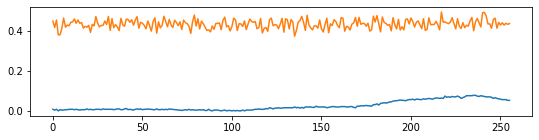

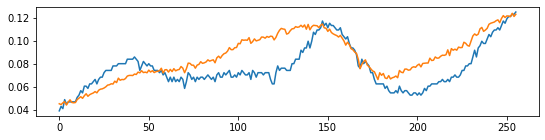

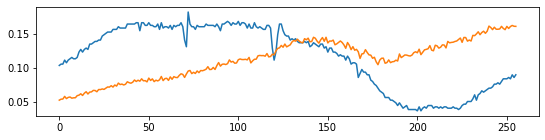

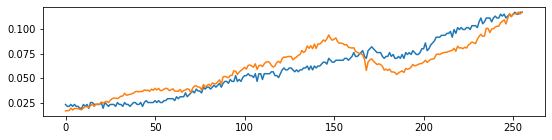

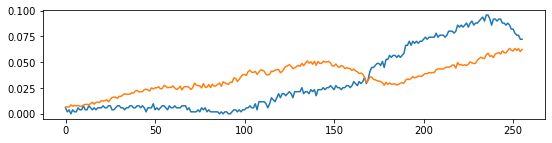

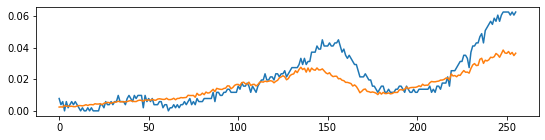

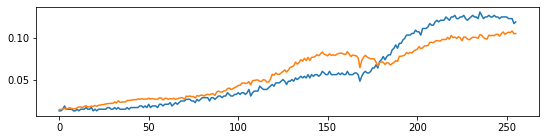

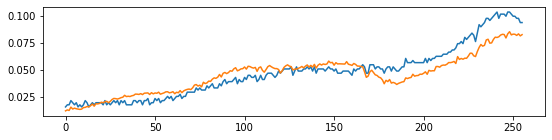

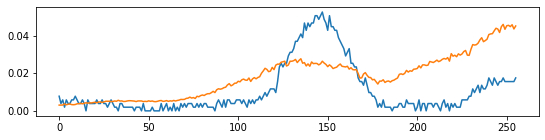

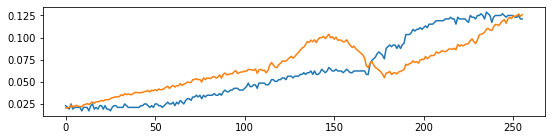

In [25]:
for k in range(0, epoch_num, int(epoch_num/10)):
    plt.figure(figsize=(9, 2))
    datas = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    plt.plot(datas)
    plt.plot(recon)

## 異常検知

In [26]:
#データの読み込み
test_path = "Obrid_AE/test_data/test0503.csv"
test_df = pd.read_csv(test_path, engine="python")
test = test_df.values/1024
print(test.shape)
print(test[0])
data_path = "Obrid_AE/test_data/data0503.csv"
data_df = pd.read_csv(data_path, engine="python")
Data = data_df.values/1024
print(Data.shape)
print(Data[0])

(50, 256)
[0.01367188 0.01757812 0.015625   0.01953125 0.015625   0.015625
 0.01757812 0.015625   0.01367188 0.015625   0.015625   0.015625
 0.01757812 0.01367188 0.015625   0.01757812 0.01367188 0.01757812
 0.01757812 0.01757812 0.01757812 0.01757812 0.015625   0.015625
 0.015625   0.015625   0.01367188 0.015625   0.01757812 0.015625
 0.015625   0.015625   0.015625   0.01757812 0.01367188 0.015625
 0.01367188 0.01171875 0.015625   0.01367188 0.01367188 0.015625
 0.015625   0.01367188 0.015625   0.015625   0.015625   0.01367188
 0.015625   0.015625   0.01757812 0.015625   0.01953125 0.015625
 0.015625   0.01367188 0.01757812 0.02148438 0.01757812 0.01953125
 0.01953125 0.01757812 0.02148438 0.01953125 0.0234375  0.02148438
 0.01953125 0.02148438 0.02539062 0.0234375  0.02539062 0.02734375
 0.02734375 0.02929688 0.02539062 0.02734375 0.0234375  0.02539062
 0.02539062 0.02734375 0.02929688 0.02734375 0.02734375 0.02734375
 0.02539062 0.02929688 0.02929688 0.0234375  0.02929688 0.03125
 0

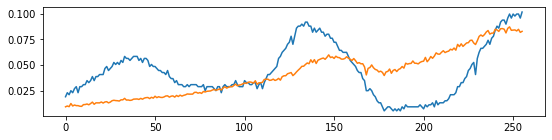

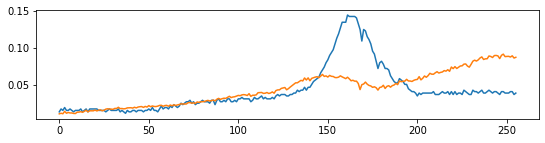

In [27]:
data0 =  torch.from_numpy((Data[0]).astype(np.float32)).clone()
test0 =  torch.from_numpy((test[0]).astype(np.float32)).clone()

plt.figure(figsize=(9, 2))
data = data0.numpy()
recon = model(data0).detach().numpy()
plt.plot(data)
plt.plot(recon)
plt.show()

plt.figure(figsize=(9, 2))
data = test0.numpy()
recon = model(test0).detach().numpy()
plt.plot(data)
plt.plot(recon)

## 一次元CNNでモデル作成

単なるAEだと直立時の波形の特徴を学習できていない
データ数が少なくて過学習になっている
多層化もしくは層の組み合わせを考える必要がある